### CIFAR-10 IMAGE CLASSIFICATION PROJECT

#### NOTEBOOK STRUCTURE:
##### Part 1: Setup & Data Loading
##### Part 2: Data Preprocessing & Exploration
##### Part 3: Model 1 - CNN (Baseline & Advanced)
##### Part 4: Model 2 - Ensemble Learning (Soft Voting)
##### Part 5: Model 3 - Hybrid CNN-Random Forest
##### Part 6: Comprehensive Model Comparison
##### Part 7: Results & Conclusions

### Part 1: Setup & Data Loading

In [3]:
print("="*70)
print(" CIFAR-10 IMAGE CLASSIFICATION ".center(70))
print(" Three-Model Comparative Study ".center(70))
print("="*70)

                    CIFAR-10 IMAGE CLASSIFICATION                     
                    Three-Model Comparative Study                     


In [3]:
# Importing necessary core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support)
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# Importing deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing libraries for saving model
import joblib
import pickle

### Part 2: Data Loading & Preprocessing

In [5]:
print("\n" + "="*70)
print(" DATA LOADING & PREPROCESSING ".center(70))
print("="*70)

print("\nLoading CIFAR-10 Dataset")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


                     DATA LOADING & PREPROCESSING                     

Loading CIFAR-10 Dataset
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# Flatten labels to remove extra array from each
y_train = y_train.flatten()
y_test = y_test.flatten()

print(f"\nFlattened labels shape: {y_train.shape}, {y_test.shape}")


Flattened labels shape: (50000,), (10000,)


In [11]:
# Data preprocessing
print("Preprocessing data: ")

# Normalising pixel value to [0,1]
X_train_normalized = X_train/255.0
X_test_normalized = X_test/255.0

# One-hot encoding labels for CNN training
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Normalised training data range: [{X_train_normalized.min():.2f}, {X_test_normalized.max():.2f}]")
print(f"One-hot encoded labels shape: {y_train_categorical.shape}")

print("\nData preprocessing complete.")

Preprocessing data: 
Normalised training data range: [0.00, 1.00]
One-hot encoded labels shape: (50000, 10)

Data preprocessing complete.



----------------------------------------------------------------------
                           DATA EXPLORATION                           
----------------------------------------------------------------------


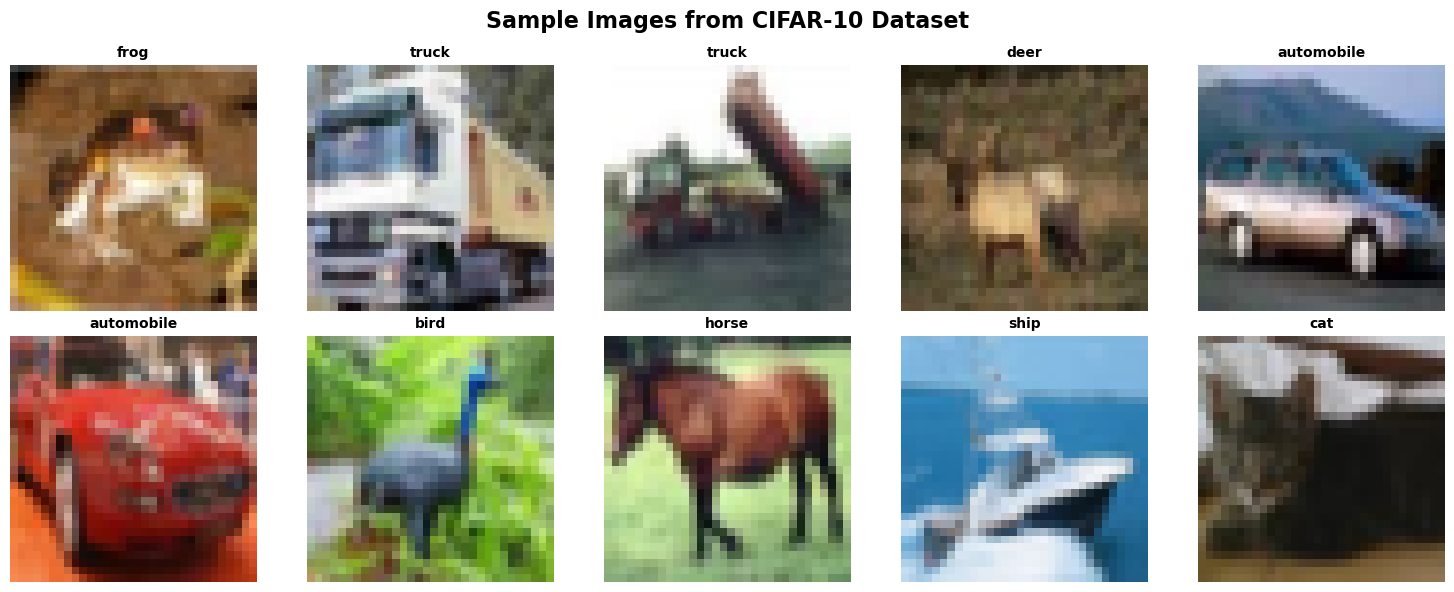

In [15]:
# Data visualisation
print("\n" + "-"*70)
print(" DATA EXPLORATION ".center(70))
print("-"*70)

# Visualise sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f'{class_names[y_train[i]]}', fontsize=10, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

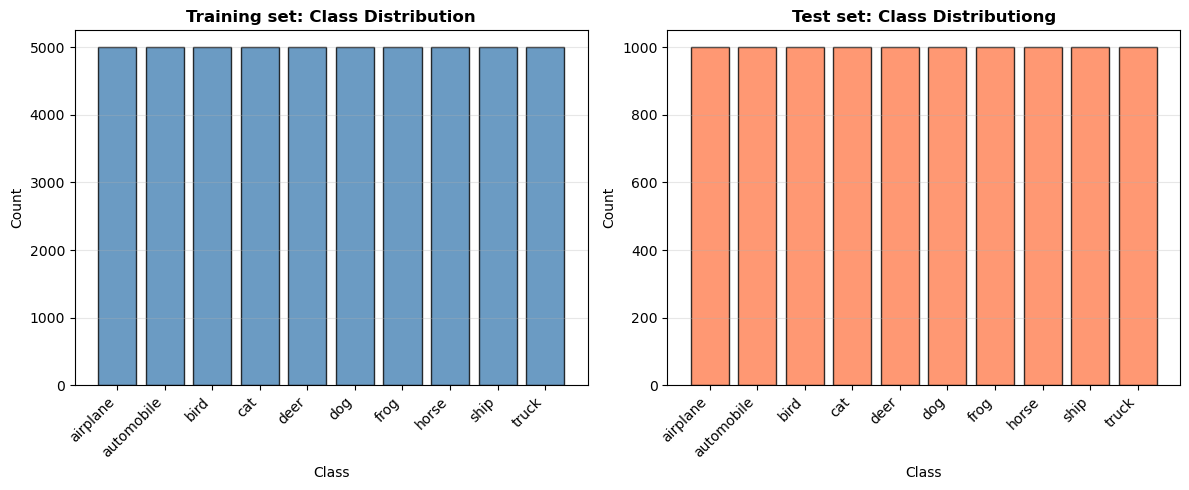


Data exploration complete.


In [17]:
# Class distribution
plt.figure(figsize=(12,5))

# Training set distribution
plt.subplot(1, 2, 1)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(class_names, counts, color='steelblue', alpha=0.8, edgecolor='black')
plt.title('Training set: Class Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Test set distributiong
plt.subplot(1, 2, 2)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(class_names, counts, color='coral', alpha=0.8, edgecolor='black')
plt.title('Test set: Class Distributiong', fontsize=12, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nData exploration complete.")

### Part 3: Model 1 - CNN (Baseline & Advanced)

#### 3.1. Baseline CNN Architecture

In [13]:
print("\n" + "-"*70)
print("Building Baseline CNN Model: ")
print("-"*70)

def build_baseline_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ], name='Baseline_CNN')
    
    return model

# Build baseline model
baseline_cnn = build_baseline_cnn()
baseline_cnn.summary()

# Compiling basline model
baseline_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nBaseline CNN model build and compiled.")


----------------------------------------------------------------------
Building Baseline CNN Model: 
----------------------------------------------------------------------


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)


Baseline CNN model build and compiled.


#### 3.2. Advanced CNN Architecture

In [15]:
print("\n" + "-"*70)
print("Building Advanced CNN Model: ")
print("-"*70)

def build_advanced_cnn(input_shape=(32, 32, 3), num_classes=10):
    # advanced cnn with batch normalisation, dropout and deeper architecture
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
    
        
        # Fully connected Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ], name='Advanced_CNN')
    
    return model

# Build advanced model
advanced_cnn = build_advanced_cnn()
advanced_cnn.summary()

# Compiling advanced model
advanced_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nAdvanced CNN model build and compiled.")


----------------------------------------------------------------------
Building Advanced CNN Model: 
----------------------------------------------------------------------


Model: "Advanced_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │              

 Total params: 289,322 (1.10 MB)

 Trainable params: 287,914 (1.10 MB)

 Non-trainable params: 1,408 (5.50 KB)


Advanced CNN model build and compiled.


#### 3.3. Training configuration

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [19]:
print("\n" + "-"*70)
print("Setting up training callbacks: ")
print("-"*70)

# Callbacks to improve training stability and prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint_baseline = ModelCheckpoint(
    'baseline_cnn_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stopping_adv = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_adv = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint_advanced = ModelCheckpoint(
    'advanced_cnn_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)


print("Training configuration complete")


----------------------------------------------------------------------
Setting up training callbacks: 
----------------------------------------------------------------------
Training configuration complete


#### 3.4. Training baseline CNN

In [51]:
print("\n" + "="*70)
print(" TRAINING BASELINE CNN ".center(70))
print("="*70)

epochs = 30
batch_size = 128

baseline_start_time = time.time()

baseline_history = baseline_cnn.fit(
    X_train_normalized, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint_baseline],
    verbose=1
)

baseline_training_time = time.time() - baseline_start_time

print(f"\nBaseline CNN training completed in  {baseline_training_time:.2f} seconds")
print(f"   ({baseline_training_time/60:.2f} minutes)")


                        TRAINING BASELINE CNN                         
Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2634 - loss: 1.9796
Epoch 1: val_accuracy improved from None to 0.50600, saving model to baseline_cnn_best.keras

Epoch 1: finished saving model to baseline_cnn_best.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.3452 - loss: 1.7772 - val_accuracy: 0.5060 - val_loss: 1.3863 - learning_rate: 0.0010
Epoch 2/30
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4716 - loss: 1.4532
Epoch 2: val_accuracy improved from 0.50600 to 0.58230, saving model to baseline_cnn_best.keras

Epoch 2: finished saving model to baseline_cnn_best.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.4929 - loss: 1.4048 - val_accuracy: 0.5823 - val_loss: 1.1907 - learning_rate: 0.0010
Epoch 3/30
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5570 - loss: 1.2472
Epoch 3: val_accuracy improved from 0.58230 to 0.62680, saving model to ba

#### 3.5. Training advanced CNN

In [21]:
print("\n" + "="*70)
print(" TRAINING ADVANCED CNN ".center(70))
print("="*70)

advanced_start_time = time.time()
epochs = 32
batch_size = 128

advanced_history = advanced_cnn.fit(
    X_train_normalized, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping_adv, reduce_lr_adv, checkpoint_advanced],
    verbose=1
)

advanced_training_time = time.time() - advanced_start_time

print(f"\nAdvanced CNN training completed in  {advanced_training_time:.2f} seconds")
print(f"   ({advanced_training_time/60:.2f} minutes)")


                        TRAINING ADVANCED CNN                         
Epoch 1/32
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.2019 - loss: 2.6433
Epoch 1: val_accuracy improved from None to 0.11100, saving model to advanced_cnn_best.keras

Epoch 1: finished saving model to advanced_cnn_best.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 306s 928ms/step - accuracy: 0.2615 - loss: 2.2230 - val_accuracy: 0.1110 - val_loss: 3.4629 - learning_rate: 0.0010
Epoch 2/32
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.3910 - loss: 1.6615
Epoch 2: val_accuracy improved from 0.11100 to 0.35590, saving model to advanced_cnn_best.keras

Epoch 2: finished saving model to advanced_cnn_best.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 654ms/step - accuracy: 0.4129 - loss: 1.5925 - val_accuracy: 0.3559 - val_loss: 1.9196 - learning_rate: 0.0010
Epoch 3/32
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4741 - loss: 1.4231
Epoch 3: val_accuracy improved from 0.35590 to 0.45820, saving model t

#### 3.6. Evaluate CNN models

In [65]:
print("\n" + "="*70)
print(" EVALUATING CNN MODELS ".center(70))
print("="*70)

#Evaluate baseline CNN
baseline_test_loss, baseline_test_accuracy = baseline_cnn.evaluate(
    X_test_normalized, y_test_categorical, verbose=0
)

# Evaluate advanced CNN
advanced_test_loss, advanced_test_accuracy = advanced_cnn.evaluate(
    X_test_normalized, y_test_categorical, verbose=0
)

print(f"\nBaseline CNN:")
print(f"  Test Loss: {baseline_test_loss:.4f}")
print(f"  Test Accuracy: {baseline_test_accuracy*100:.2f}%")

print(f"\nAdvanced CNN:")
print(f"  Test Loss: {advanced_test_loss:.4f}")
print(f"  Test Accuracy: {advanced_test_accuracy*100:.2f}%")

print(f"\nImprovement: {(advanced_test_accuracy - baseline_test_accuracy)*100:+.2f}%")

# Get predictions
baseline_predictions = np.argmax(baseline_cnn.predict(X_test_normalized, verbose=0), axis=1)
advanced_predictions = np.argmax(advanced_cnn.predict(X_test_normalized, verbose=0), axis=1)


                        EVALUATING CNN MODELS                         

Baseline CNN:
  Test Loss: 0.7572
  Test Accuracy: 74.20%

Advanced CNN:
  Test Loss: 0.5177
  Test Accuracy: 82.58%

Improvement: +8.38%


#### 3.7: Visualize Training History


----------------------------------------------------------------------
Generating training visualizations
----------------------------------------------------------------------


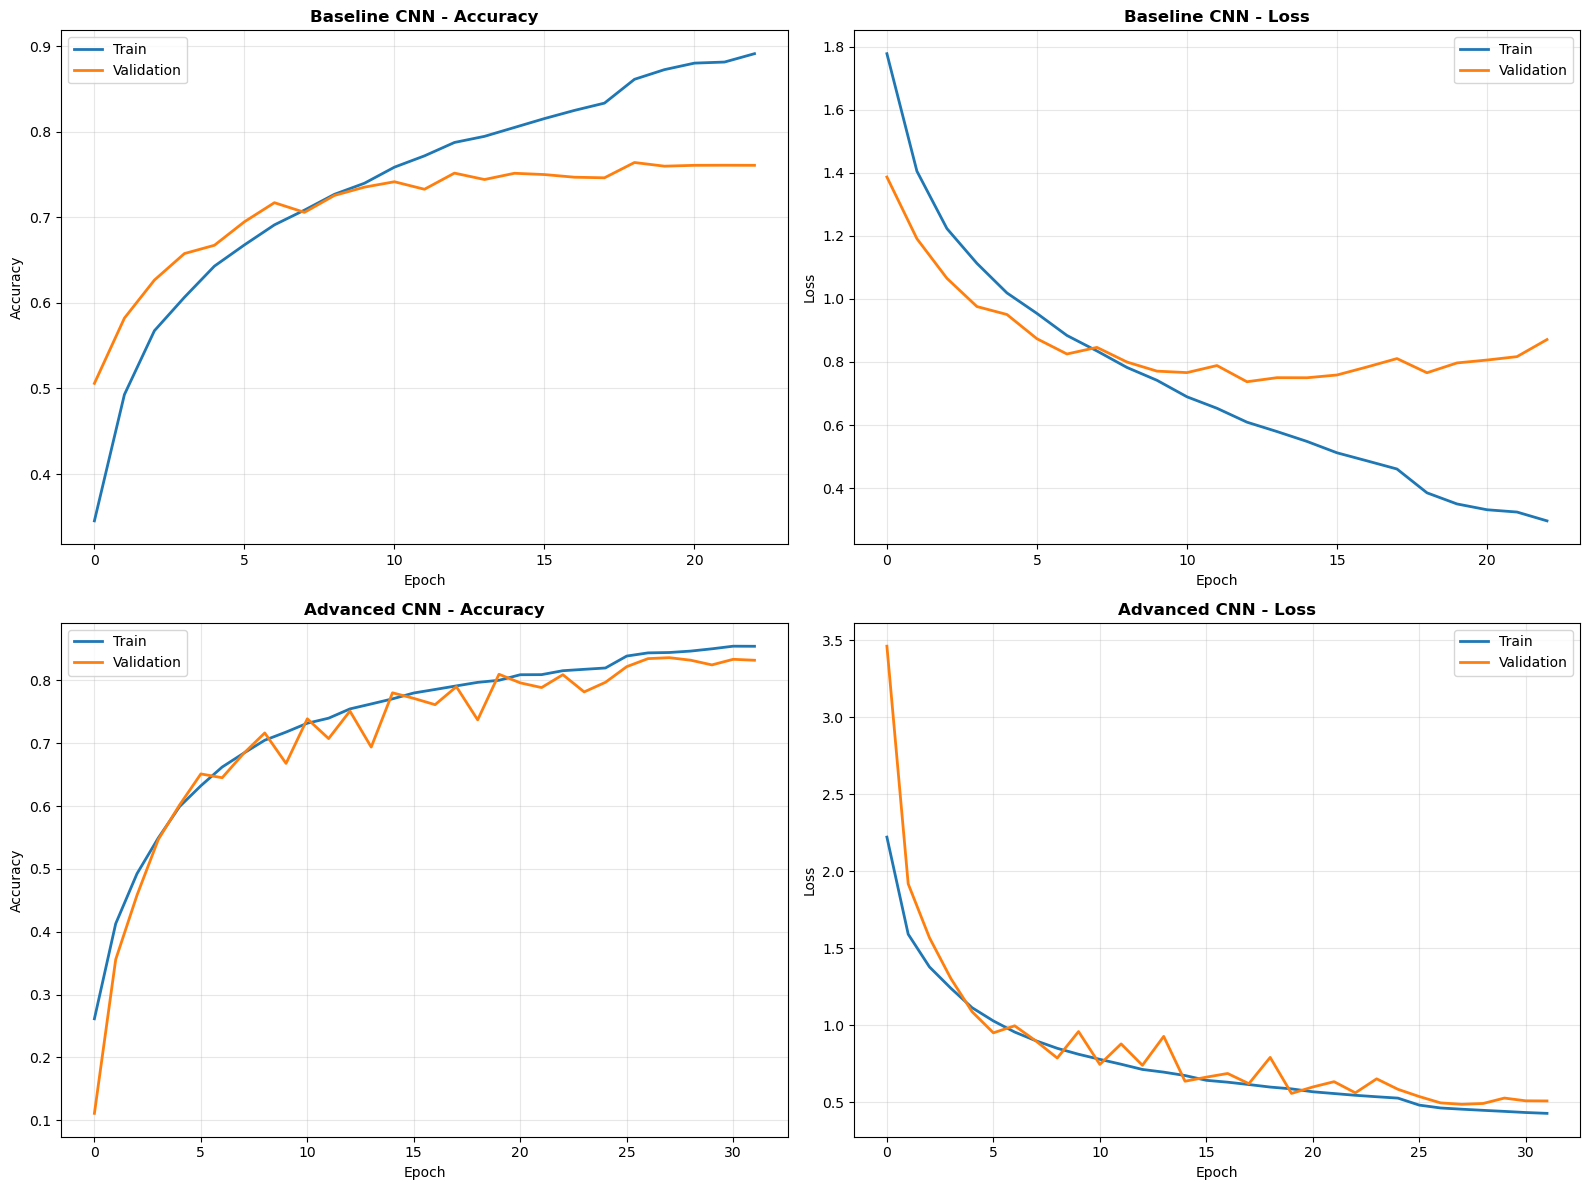

Training visualizations saved.


In [66]:
print("\n" + "-"*70)
print("Generating training visualizations")
print("-"*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Baseline - Accuracy
axes[0, 0].plot(baseline_history.history['accuracy'], label='Train', linewidth=2)
axes[0, 0].plot(baseline_history.history['val_accuracy'], label='Validation', linewidth=2)
axes[0, 0].set_title('Baseline CNN - Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Baseline - Loss
axes[0, 1].plot(baseline_history.history['loss'], label='Train', linewidth=2)
axes[0, 1].plot(baseline_history.history['val_loss'], label='Validation', linewidth=2)
axes[0, 1].set_title('Baseline CNN - Loss', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Advanced - Accuracy
axes[1, 0].plot(advanced_history.history['accuracy'], label='Train', linewidth=2)
axes[1, 0].plot(advanced_history.history['val_accuracy'], label='Validation', linewidth=2)
axes[1, 0].set_title('Advanced CNN - Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Advanced - Loss
axes[1, 1].plot(advanced_history.history['loss'], label='Train', linewidth=2)
axes[1, 1].plot(advanced_history.history['val_loss'], label='Validation', linewidth=2)
axes[1, 1].set_title('Advanced CNN - Loss', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cnn_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("Training visualizations saved.")

#### 3.8: CNN Confusion Matrices

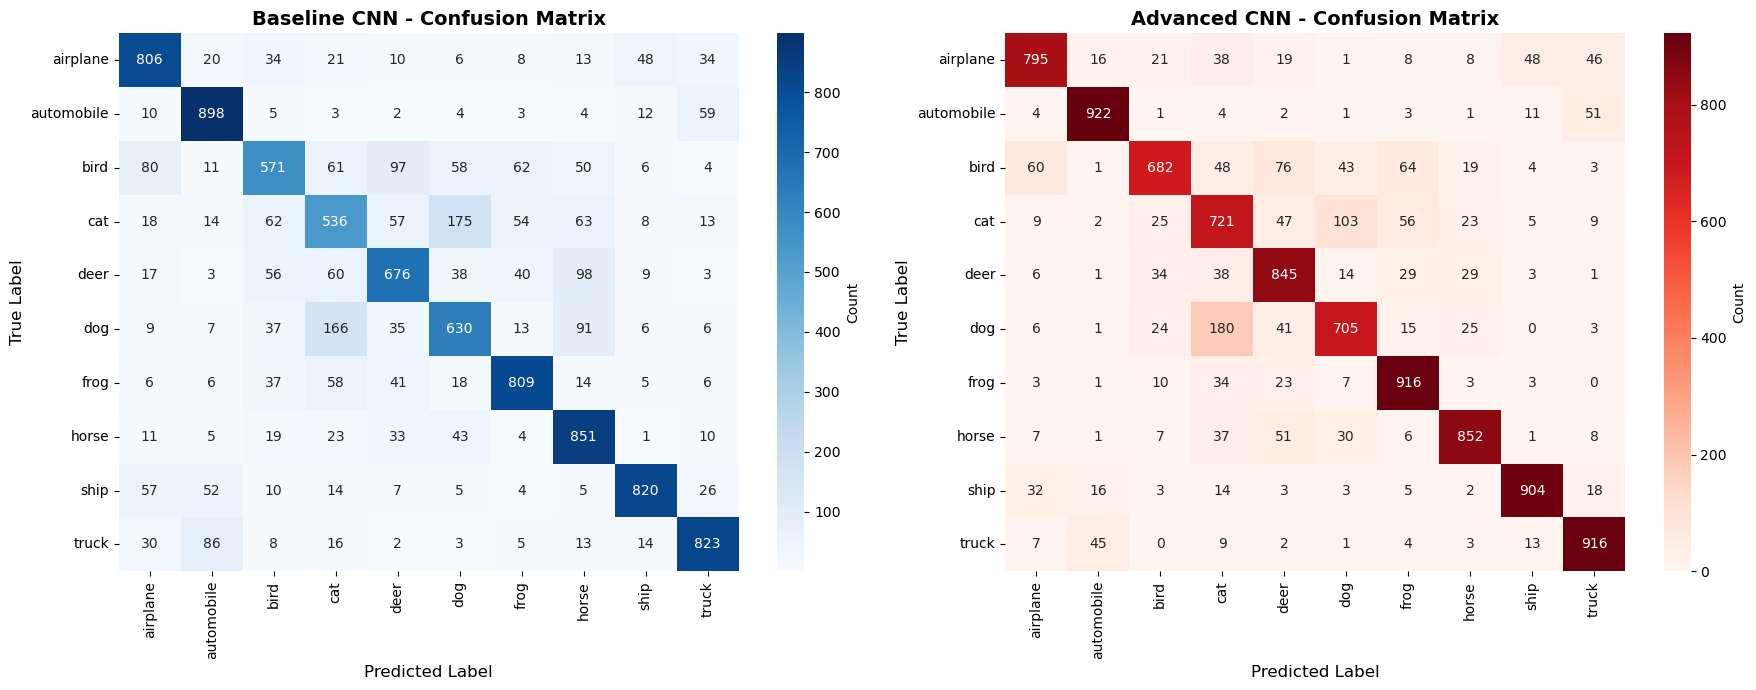


 Model 1 (CNN) complete!


Models saved.


In [122]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Baseline confusion matrix
cm_baseline = confusion_matrix(y_test, baseline_predictions)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, ax=axes[0])
axes[0].set_title('Baseline CNN - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Advanced confusion matrix
cm_advanced = confusion_matrix(y_test, advanced_predictions)
sns.heatmap(cm_advanced, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, ax=axes[1])
axes[1].set_title('Advanced CNN - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.savefig('cnn_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Model 1 (CNN) complete!")

# Save models
baseline_cnn.save('baseline_cnn_final.h5')
advanced_cnn.save('advanced_cnn_final.h5')
print("Models saved.")

### Part 4: MODEL 2 - ENSEMBLE LEARNING (SOFT VOTING)

In [71]:
print("\n" + "="*70)
print(" MODEL 2: ENSEMBLE LEARNING (SOFT VOTING) ".center(70))
print("="*70)

def ensemble_soft_voting(models, X_test):
    #Combine predictions using soft voting
    all_predictions=[]

    for model in models:
        probs = model.predict(X_test, verbose=0)
        all_predictions.append(probs)

    avg_probabilities = np.mean(all_predictions, axis=0)
    predictions = np.argmax(avg_probabilities, axis=1)

    return predictions, avg_probabilities

# Combine models
models_list = [baseline_cnn, advanced_cnn]

print("\nGenerating ensemble predictions..")
ensemble_predictions, ensemble_probs = ensemble_soft_voting(models_list, X_test_normalized)

#Evaluate ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print(f"\n{'='*70}")
print(f" ENSEMBLE MODEL PERFORMANCE ".center(70))
print(f"{'='*70}")
print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")

# Comparison
baseline_acc = accuracy_score(y_test, baseline_predictions)
advanced_acc = accuracy_score(y_test, advanced_predictions)

print(f"\n{'='*70}")
print(f" MODEL COMPARISON ".center(70))
print(f"{'='*70}")
print(f"Baseline CNN:  {baseline_acc * 100:.2f}%")
print(f"Advanced CNN:  {advanced_acc * 100:.2f}%")
print(f"Ensemble CNN:  {ensemble_accuracy * 100:.2f}%")
print(f"\nImprovement over Baseline: {(ensemble_accuracy - baseline_acc) * 100:+.2f}%")
print(f"Improvement over Advanced: {(ensemble_accuracy - advanced_acc) * 100:+.2f}%")


               MODEL 2: ENSEMBLE LEARNING (SOFT VOTING)               

Generating ensemble predictions..

                      ENSEMBLE MODEL PERFORMANCE                      
Ensemble Accuracy: 82.71%

                           MODEL COMPARISON                           
Baseline CNN:  74.20%
Advanced CNN:  82.58%
Ensemble CNN:  82.71%

Improvement over Baseline: +8.51%
Improvement over Advanced: +0.13%


In [73]:
# Detailed report
print(f"\n{'-'*70}")
print("Classification Report:")
print(f"{'-'*70}")
print(classification_report(y_test, ensemble_predictions, target_names=class_names))


----------------------------------------------------------------------
Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

    airplane       0.84      0.83      0.83      1000
  automobile       0.90      0.93      0.92      1000
        bird       0.83      0.67      0.74      1000
         cat       0.67      0.70      0.68      1000
        deer       0.78      0.84      0.81      1000
         dog       0.77      0.72      0.74      1000
        frog       0.84      0.90      0.87      1000
       horse       0.86      0.89      0.87      1000
        ship       0.92      0.90      0.91      1000
       truck       0.88      0.91      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



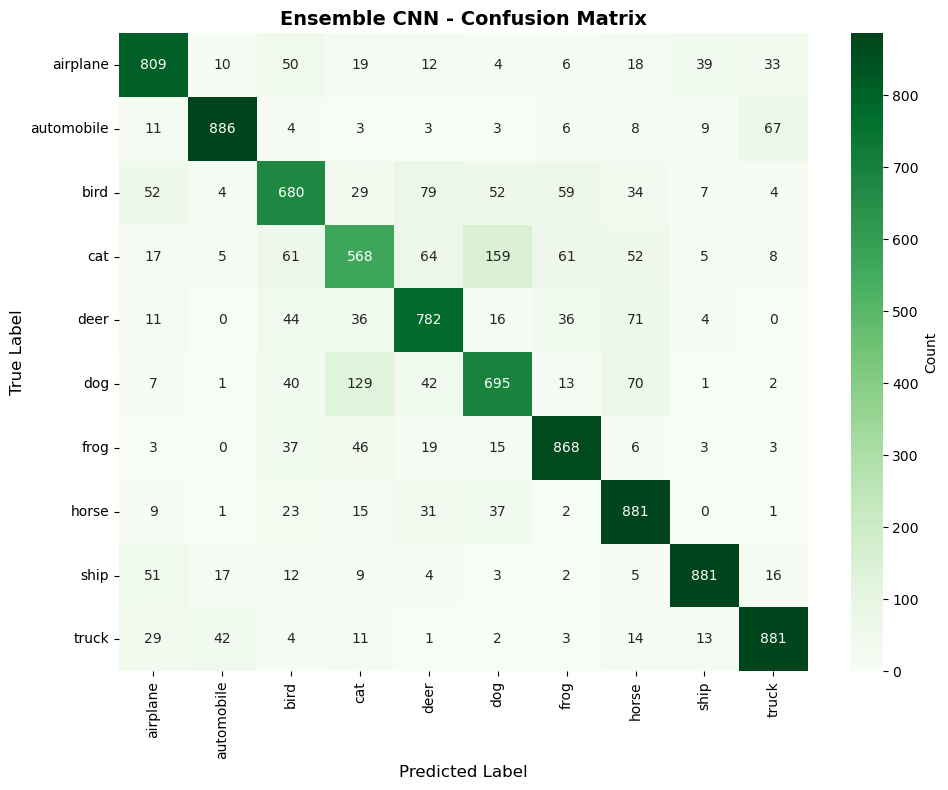

In [59]:
# Ensemble confusion matrix
plt.figure(figsize=(10, 8))
cm_ensemble = confusion_matrix(y_test, ensemble_predictions)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Ensemble CNN - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('ensemble_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
# Save ensemble results
np.save('ensemble_predictions.npy', ensemble_predictions)
np.save('ensemble_probabilities.npy', ensemble_probs)

print("\n Model 2 (Ensemble) complete.")


 Model 2 (Ensemble) complete.


### Part 5: MODEL 3 - HYBRID CNN-RANDOM FOREST

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import numpy as np

In [77]:
advanced_cnn = load_model("advanced_cnn_final.h5")
print("Advanced CNN loaded successfully")

Advanced CNN loaded successfully


In [3]:
print("\n" + "="*70)
print(" MODEL 3: HYBRID CNN-RANDOM FOREST ".center(70))
print("="*70)


                  MODEL 3: HYBRID CNN-RANDOM FOREST                   


#### 5.1: Create Feature Extractor

In [79]:
import numpy as np

print("\n" + "-"*70)
print("Creating CNN Feature Extractor...")
print("-"*70)

# Build the model first
print("\nBuilding model with dummy data...")
dummy_input = np.zeros((1, 32, 32, 3), dtype=np.float32)
_ = advanced_cnn(dummy_input, training=False)
print("Model built successfully!")

# Print layers
print("\nModel Layers:")
for i, layer in enumerate(advanced_cnn.layers):
    print(f"  {i}: {layer.name:30s} -> {str(layer.output.shape):20s}")

# Create a NEW functional model for feature extraction
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define input
inputs = Input(shape=(32, 32, 3))

# Pass through all layers EXCEPT the last one (classification layer)
x = inputs
for layer in advanced_cnn.layers[:-1]:  # Exclude last layer
    x = layer(x)

# Create feature extractor model
feature_extractor = Model(inputs=inputs, outputs=x)

print(f"\nFeature extraction from: {advanced_cnn.layers[-2].name}")
print(f"Feature shape: {x.shape}")
print("\nFeature extractor created!")


----------------------------------------------------------------------
Creating CNN Feature Extractor...
----------------------------------------------------------------------

Building model with dummy data...
Model built successfully!

Model Layers:
  0: conv2d_3                       -> (None, 32, 32, 32)  
  1: batch_normalization            -> (None, 32, 32, 32)  
  2: activation                     -> (None, 32, 32, 32)  
  3: conv2d_4                       -> (None, 32, 32, 32)  
  4: batch_normalization_1          -> (None, 32, 32, 32)  
  5: activation_1                   -> (None, 32, 32, 32)  
  6: max_pooling2d_3                -> (None, 16, 16, 32)  
  7: dropout_1                      -> (None, 16, 16, 32)  
  8: conv2d_5                       -> (None, 16, 16, 64)  
  9: batch_normalization_2          -> (None, 16, 16, 64)  
  10: activation_2                   -> (None, 16, 16, 64)  
  11: conv2d_6                       -> (None, 16, 16, 32)  
  12: batch_normalization

#### 5.2: Extract Features

In [81]:
print("\n" + "-"*70)
print("Extracting Deep Features...")
print("-"*70)

def extract_features(model, X, batch_size=128):
    """Extract features from images"""
    print(f"Processing {len(X)} images...")
    features = model.predict(X, batch_size=batch_size, verbose=1)
    
    # Flatten if needed
    if len(features.shape) > 2:
        features = features.reshape(features.shape[0], -1)
    
    return features

# Extract features from train and test sets
print("\nExtracting training features...")
X_train_features = extract_features(feature_extractor, X_train_normalized)

print("\nExtracting test features...")
X_test_features = extract_features(feature_extractor, X_test_normalized)

print(f"\nTraining features shape: {X_train_features.shape}")
print(f"Test features shape: {X_test_features.shape}")
print(f"Feature dimensionality: {X_train_features.shape[1]}")

print("\nFeature extraction complete!")


----------------------------------------------------------------------
Extracting Deep Features...
----------------------------------------------------------------------

Extracting training features...
Processing 50000 images...
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step

Extracting test features...
Processing 10000 images...
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step

Training features shape: (50000, 128)
Test features shape: (10000, 128)
Feature dimensionality: 128

Feature extraction complete!


#### 5.3: Train Random Forest

In [83]:
print("\n" + "="*70)
print(" TRAINING RANDOM FOREST CLASSIFIER ".center(70))
print("="*70)

# Initialize Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nRandom Forest Configuration:")
print(f"  - Trees: {rf_classifier.n_estimators}")
print(f"  - Max Depth: {rf_classifier.max_depth}")
print(f"  - Min Samples Split: {rf_classifier.min_samples_split}")
print(f"  - Max Features: {rf_classifier.max_features}")

# Train Random Forest
print("\nTraining Random Forest on extracted features...")
rf_start_time = time.time()

rf_classifier.fit(X_train_features, y_train)

rf_training_time = time.time() - rf_start_time

print(f"\nRandom Forest training completed in {rf_training_time:.2f} seconds")
print(f"   ({rf_training_time/60:.2f} minutes)")


                  TRAINING RANDOM FOREST CLASSIFIER                   

Random Forest Configuration:
  - Trees: 100
  - Max Depth: 20
  - Min Samples Split: 5
  - Max Features: sqrt

Training Random Forest on extracted features...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s



Random Forest training completed in 33.22 seconds
   (0.55 minutes)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.0s finished


#### 5.4: Make Predictions

In [85]:
print("\n" + "-"*70)
print("Generating predictions...")
print("-"*70)

# Predictions
y_train_pred_rf = rf_classifier.predict(X_train_features)
y_test_pred_rf = rf_classifier.predict(X_test_features)

# Calculate accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\nTraining Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Test Accuracy:     {test_accuracy_rf * 100:.2f}%")

# Store predictions for later comparison
hybrid_predictions = y_test_pred_rf


----------------------------------------------------------------------
Generating predictions...
----------------------------------------------------------------------


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s



Training Accuracy: 97.78%
Test Accuracy:     83.31%


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


#### 5.5: Evaluate Hybrid Model

In [87]:
print("\n" + "="*70)
print(" HYBRID MODEL PERFORMANCE ".center(70))
print("="*70)

# Classification report
print("\nClassification Report:")
print("-"*70)
print(classification_report(y_test, hybrid_predictions, target_names=class_names))


                       HYBRID MODEL PERFORMANCE                       

Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

    airplane       0.83      0.85      0.84      1000
  automobile       0.92      0.93      0.93      1000
        bird       0.78      0.75      0.76      1000
         cat       0.67      0.70      0.68      1000
        deer       0.80      0.81      0.81      1000
         dog       0.76      0.73      0.75      1000
        frog       0.88      0.88      0.88      1000
       horse       0.87      0.88      0.87      1000
        ship       0.91      0.91      0.91      1000
       truck       0.91      0.89      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



#### 5.6: Compare with Original CNN

In [89]:
cnn_accuracy = accuracy_score(y_test, advanced_predictions)

print("\n" + "="*70)
print(" CNN vs HYBRID COMPARISON ".center(70))
print("="*70)
print(f"Original CNN Accuracy:    {cnn_accuracy * 100:.2f}%")
print(f"Hybrid CNN-RF Accuracy:   {test_accuracy_rf * 100:.2f}%")
print(f"Difference:               {(test_accuracy_rf - cnn_accuracy) * 100:+.2f}%")


                       CNN vs HYBRID COMPARISON                       
Original CNN Accuracy:    82.58%
Hybrid CNN-RF Accuracy:   83.31%
Difference:               +0.73%


#### 5.7: Visualize Results


----------------------------------------------------------------------
Generating visualizations...
----------------------------------------------------------------------


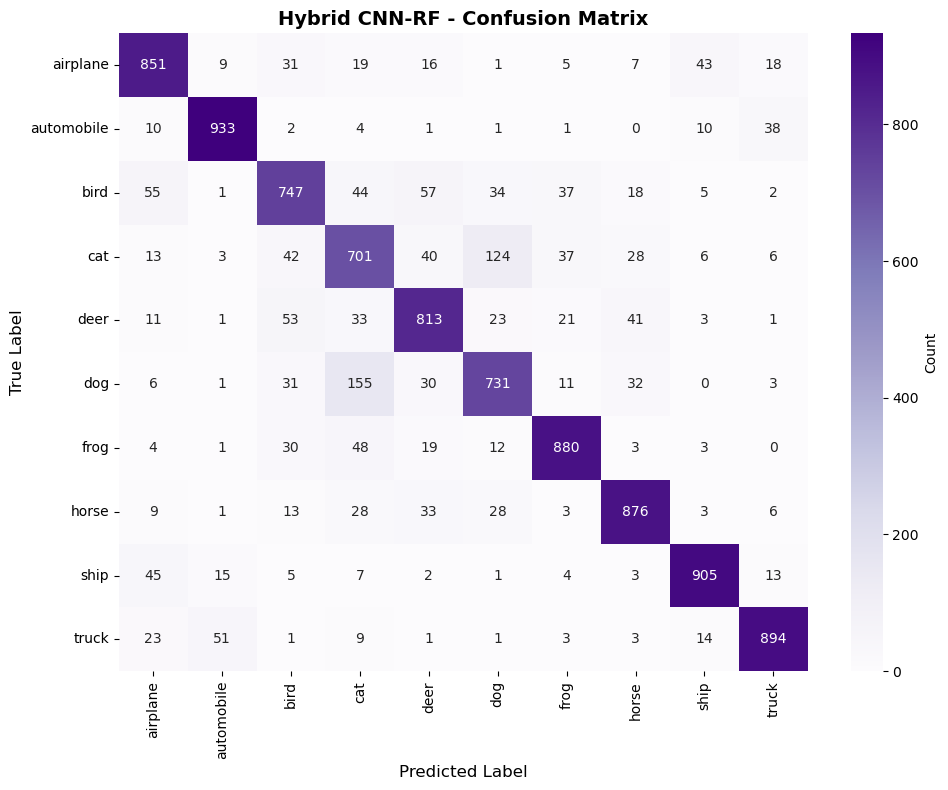

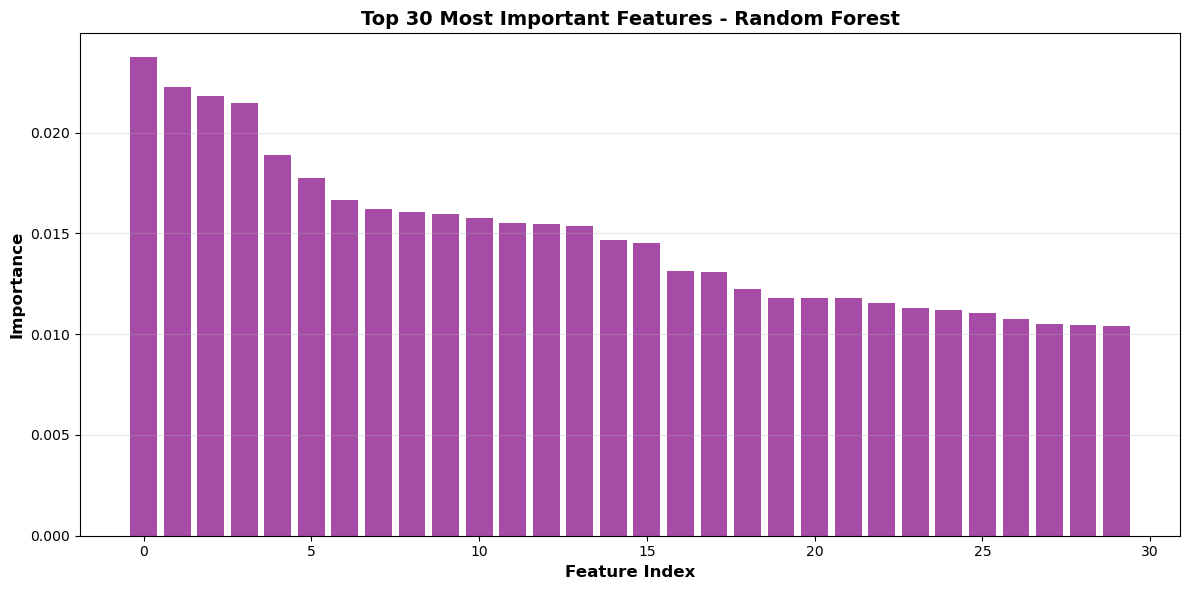

In [49]:
print("\n" + "-"*70)
print("Generating visualizations...")
print("-"*70)

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm_hybrid = confusion_matrix(y_test, hybrid_predictions)
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Purples', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Hybrid CNN-RF - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('hybrid_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
plt.figure(figsize=(12, 6))
feature_importance = rf_classifier.feature_importances_
top_indices = np.argsort(feature_importance)[-30:][::-1]

plt.bar(range(30), feature_importance[top_indices], color='purple', alpha=0.7)
plt.xlabel('Feature Index', fontsize=12, fontweight='bold')
plt.ylabel('Importance', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

#### Save Model

In [ ]:
# Save models
joblib.dump(rf_classifier, 'random_forest_classifier.pkl')
feature_extractor.save('cnn_feature_extractor.h5')
np.save('hybrid_predictions.npy', hybrid_predictions)

print("\nModel 3 (Hybrid CNN-RF) complete!")

### PART 6: Comprehensive Model Comparison

In [91]:
print("\n" + "="*70)
print(" COMPREHENSIVE MODEL COMPARISON ".center(70))
print("="*70)


                    COMPREHENSIVE MODEL COMPARISON                    


#### 6.1: Collect All Metrics

In [93]:
def calculate_all_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted', zero_division=0)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'F1-Score': f1 * 100
    }

# Calculate metrics for all models
metrics_list = [
    calculate_all_metrics(y_test, baseline_predictions, 'Baseline CNN'),
    calculate_all_metrics(y_test, advanced_predictions, 'Advanced CNN'),
    calculate_all_metrics(y_test, ensemble_predictions, 'Ensemble CNN'),
    calculate_all_metrics(y_test, hybrid_predictions, 'Hybrid CNN-RF')
]

metrics_df = pd.DataFrame(metrics_list)

#### 6.2: Display Summary

In [95]:
print("\n" + "="*70)
print(" PERFORMANCE SUMMARY ".center(70))
print("="*70)
print(metrics_df.to_string(index=False))

best_model_idx = metrics_df['Accuracy'].idxmax()
best_model = metrics_df.loc[best_model_idx, 'Model']
best_accuracy = metrics_df.loc[best_model_idx, 'Accuracy']

print("\n" + "-"*70)
print(f"Best Model: {best_model}")
print(f"   Accuracy: {best_accuracy:.2f}%")
print("-"*70)


                         PERFORMANCE SUMMARY                          
        Model  Accuracy  Precision  Recall  F1-Score
 Baseline CNN     74.20  74.084311   74.20 73.986648
 Advanced CNN     82.58  82.884230   82.58 82.540805
 Ensemble CNN     82.71  82.743294   82.71 82.596536
Hybrid CNN-RF     83.31  83.343560   83.31 83.311575

----------------------------------------------------------------------
Best Model: Hybrid CNN-RF
   Accuracy: 83.31%
----------------------------------------------------------------------


### PART 7: Result & Comparison

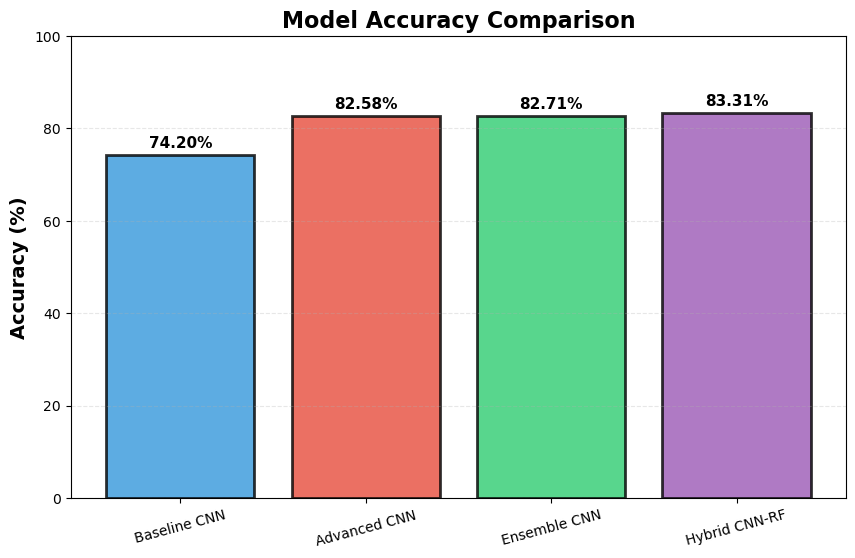

In [107]:
# Plot 1: Overall Accuracy
fig = plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
bars = plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylim([0, 100])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.show()


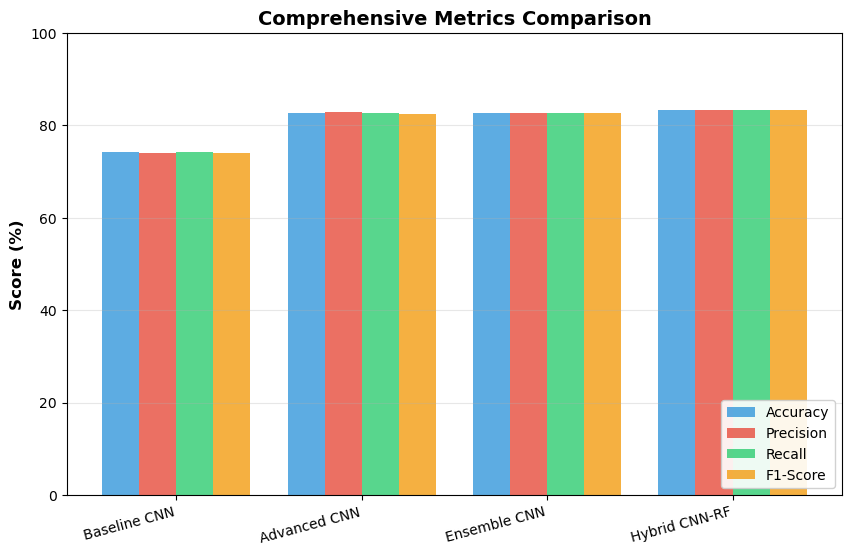

In [109]:
# Plot 2: All Metrics Comparison
fig = plt.figure(figsize=(10, 6))
x = np.arange(len(metrics_df))
width = 0.2

plt.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy', color='#3498db', alpha=0.8)
plt.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision', color='#e74c3c', alpha=0.8)
plt.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall', color='#2ecc71', alpha=0.8)
plt.bar(x + 1.5*width, metrics_df['F1-Score'], width, label='F1-Score', color='#f39c12', alpha=0.8)

plt.ylabel('Score (%)', fontsize=12, fontweight='bold')
plt.title('Comprehensive Metrics Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, metrics_df['Model'], rotation=15, ha='right')
plt.ylim([0, 100])
plt.grid(axis='y', alpha=0.3)
plt.legend(loc='lower right', framealpha=0.9)

plt.show()


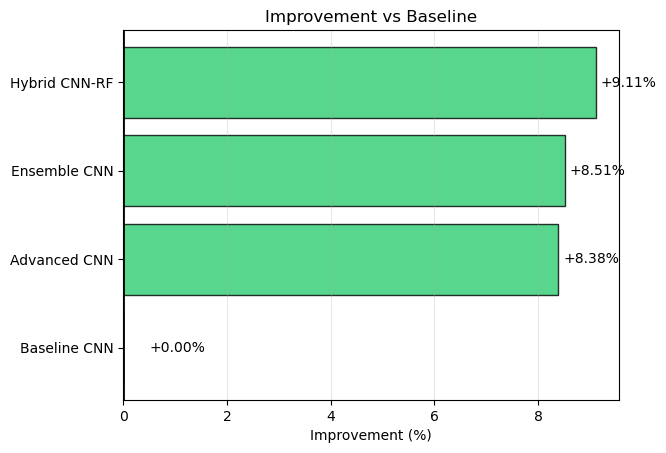

In [120]:
# Plot 3: Improvement Over Baseline
baseline_acc = metrics_df.loc[0, 'Accuracy']
improvements = metrics_df['Accuracy'] - baseline_acc

colors_imp = ['gray' if x <= 0 else '#2ecc71' for x in improvements]
bars = plt.barh(metrics_df['Model'], improvements, color=colors_imp, alpha=0.8, edgecolor='black')
plt.axvline(0, color='black', linewidth=2)

plt.xlabel('Improvement (%)')
plt.title('Improvement vs Baseline')
plt.grid(axis='x', alpha=0.3)

for i, val in enumerate(improvements):
    # just shift the text a tiny bit right if 0
    offset = 0.5 if val == 0 else 0.1
    plt.text(val + offset, i, f'{val:+.2f}%', va='center')

plt.show()
